# Chapter 2 - Introduction to Time Series Modeling

Since the vast majority of financial data has a time dimension, time series modeling is a good approach to capture the characteristics of an event in a solid way

Formal Definition of time series:
- A time series is a set of observations $X_t$ each one being recorded at a specific time $t$.

In [20]:
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [24]:
import yfinance as yf
import matplotlib.pyplot as plt

ticker = "CL=F"  # ou "BZ=F" ou "OIL"
start_date = "1980-01-01"
end_date   = "2020-01-01"

data = yf.download(ticker, start=start_date, end=end_date)



[*********************100%***********************]  1 of 1 completed


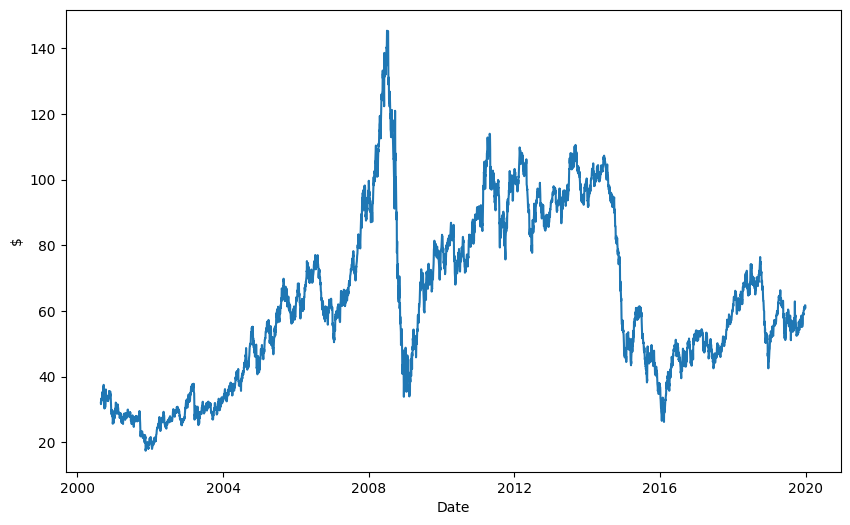

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(data.Close)
plt.ylabel('$')
plt.xlabel('Date')
plt.show()

- Remark: Quandl did not work (could not get the API key to work)

Time Series approach is superior since correlations of observations in time better explain the current value. Having data with a correlated structure in time implies a violation of the famous identically and independently distributed (IID) assumption

IID assumption enables us to model joint probability of data as the product of probability of observations. The process $X_t$ is said to be an IID with mean 0 and variance $\sigma^2$:

$$ X_t \approx IID (0,\sigma^2)$$

## Time Series Components

In [27]:
import yfinance as yf
import numpy as np
import pandas as pd
import datetime
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
ticker = "^GSPC" #SP500
start = datetime.datetime(2015,1,1)
end = datetime.datetime(2021,1,1)
SP_prices = yf.download(ticker, start=start, end=end, interval = "1mo").Close

[*********************100%***********************]  1 of 1 completed


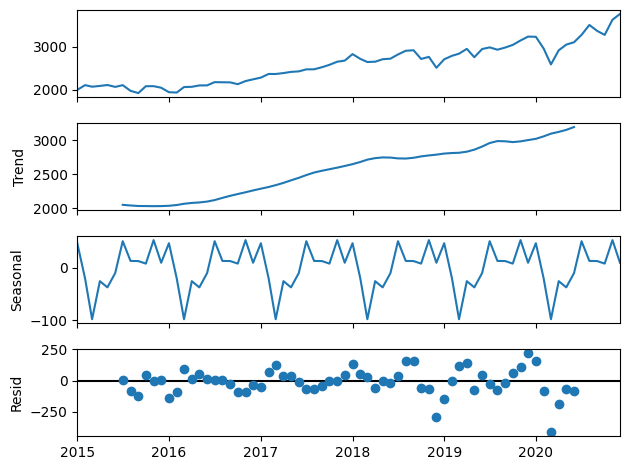

In [31]:
seasonal_decompose(SP_prices, period=12).plot()
plt.show()

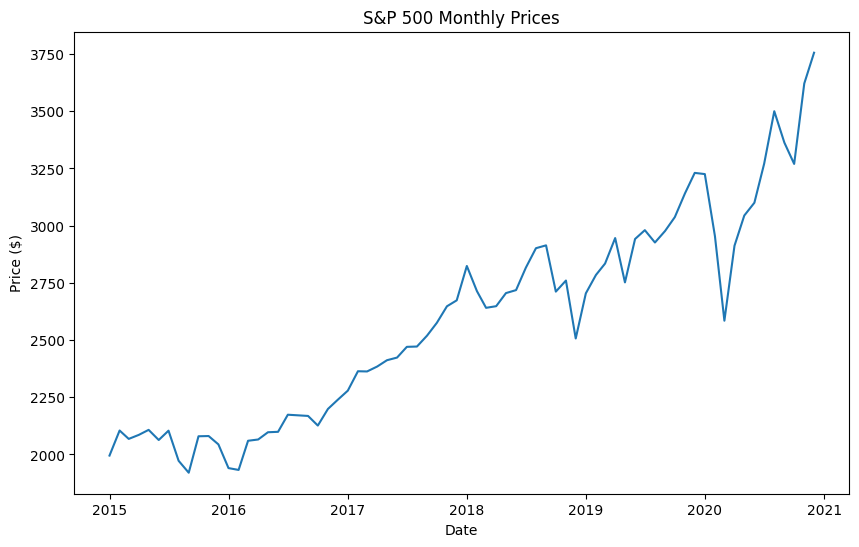

In [32]:
plt.figure(figsize=(10,6))
plt.plot(SP_prices)
plt.title("S&P 500 Monthly Prices")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.show()

We can see a clear trend (tendency of an increase)

### Autocorrelation function (ACF)

ACF is a statistical tool to analyze the relationship between the current value of a time series and its lagged values:

$$ \rho(h)=\frac{Cov(X_{t'}X_{t-h})}{Var(X_t)}$$

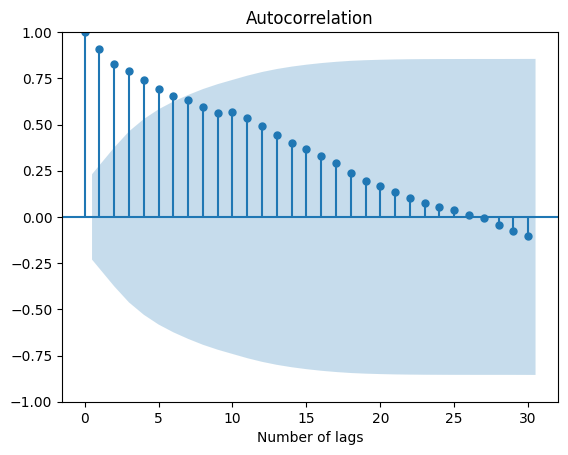

In [33]:
sm.graphics.tsa.plot_acf(SP_prices, lags=30)
plt.xlabel("Number of lags")
plt.show()

Sources of autocorrelation:

- The primary source of autocorrelation is carryover, the preceding observation has an impact on the current one

- Model misspecification

- Measurement error (difference between observed and actual value)

- Dropping a variable, which has an explanatory power

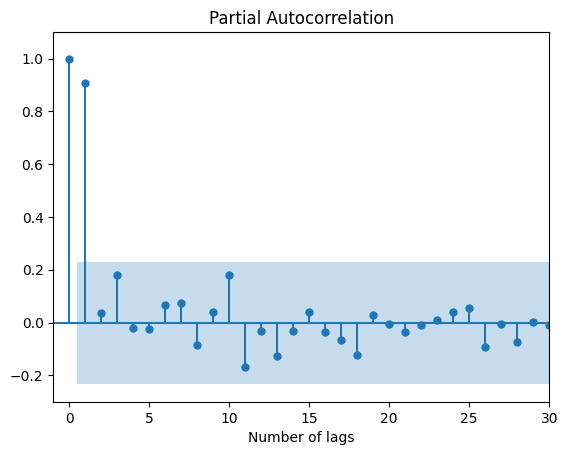

In [39]:
sm.graphics.tsa.plot_pacf(SP_prices, lags=30)
plt.xlabel("Number of lags")
plt.xlim(-1,30)
plt.ylim(-0.3, 1.1)
plt.show()

### Seasonality

Exists if there are regular fluctuations over a giver period of time

In [48]:
from fredapi import Fred
import statsmodels.api as sm

In [56]:
fred = Fred(api_key = "108a115c2d805027b19703c9b7b54d70")

In [60]:
energy = fred.get_series("CAPUTLG2211A2S",
                         observation_start="2010-01-01",
                         observation_end="2020-12-31")
energy.head(12)

2010-01-01    83.6346
2010-02-01    84.8346
2010-03-01    81.9157
2010-04-01    79.3578
2010-05-01    82.6290
2010-06-01    84.2107
2010-07-01    83.4174
2010-08-01    83.5725
2010-09-01    83.5199
2010-10-01    80.6725
2010-11-01    81.5629
2010-12-01    85.7794
dtype: float64

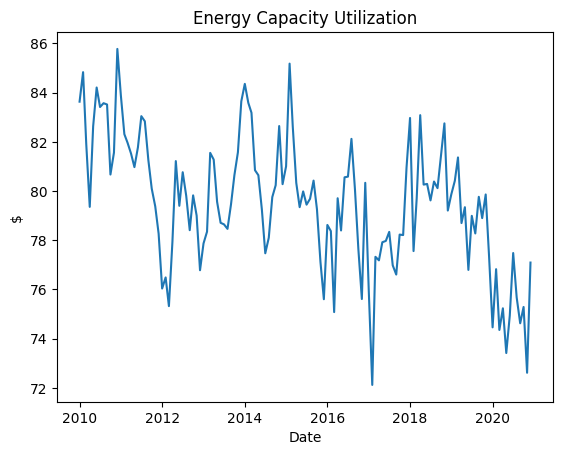

In [61]:
plt.plot(energy)
plt.title("Energy Capacity Utilization")
plt.ylabel("$")
plt.xlabel("Date")
plt.show()

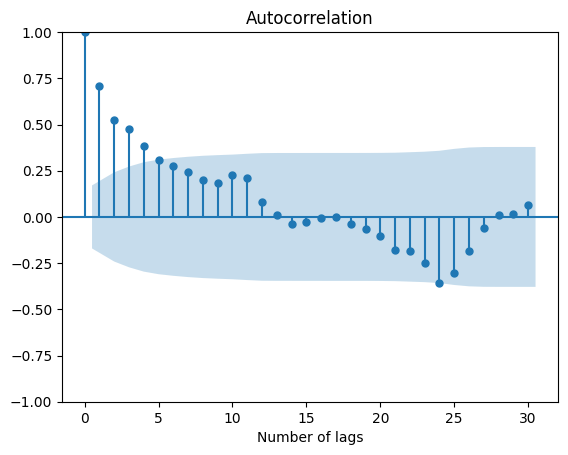

In [62]:
sm.graphics.tsa.plot_acf(energy,lags=30)
plt.xlabel("Number of lags")
plt.show()

### Residual

irregular component of time series. Equal to the difference between observations and related fitted values. Leftover from the model

The most prominent assumption of time series modeling is stationarity:


Weak Stationarity:
Time Series $X_t$ is said to be stationarity if:
 - $X_t$ has finite variance, $\mathbf{E}(X_t ^2)<\infty$
 - The mean value of $X_t$ is constant and does soleley depend on time, $\mathbf{E}(X_t)=\mu , t $
 - Covariance structure, $\gamma (t,t+h)$, depends on the time difference only:
 $$ \gamma (h) = \gamma _h + \gamma (t+h,t)

Strong Stationary: 
- If the joint distribution of $X_{t_1},X_{t_2},\dots,X_{t_k}$ is the same with the shifted version of set $X_{t_1 +h'},X_{t_2 + h'},\dots X_{t_k + h}$, is referred to as strong stationary. $\rightarrow$ strong stationary implies that distribution of random variables of a random process is the same with a shifting time index

Why we need Stationary?

- It is essential to have some distribution as time goes on


There are, two ways do detect nonstationarity: visualization and statistical methods

Slow-decaying ACF implies that the data is nonstatitionary because it presents a strong correlation in time

ADF (Dickey-Fuller) is a good test to see if data is stationary or not.

In [41]:
stat_test=adfuller(SP_prices)[0:2]
print(" The best statistic and p-value of ADF test are {}".format(stat_test))

 The best statistic and p-value of ADF test are (0.030295120072923024, 0.9609669053518536)


Taking the difference is an efficient technique for removing the stationarity (subtractting the current value of the series from its first lagged value).

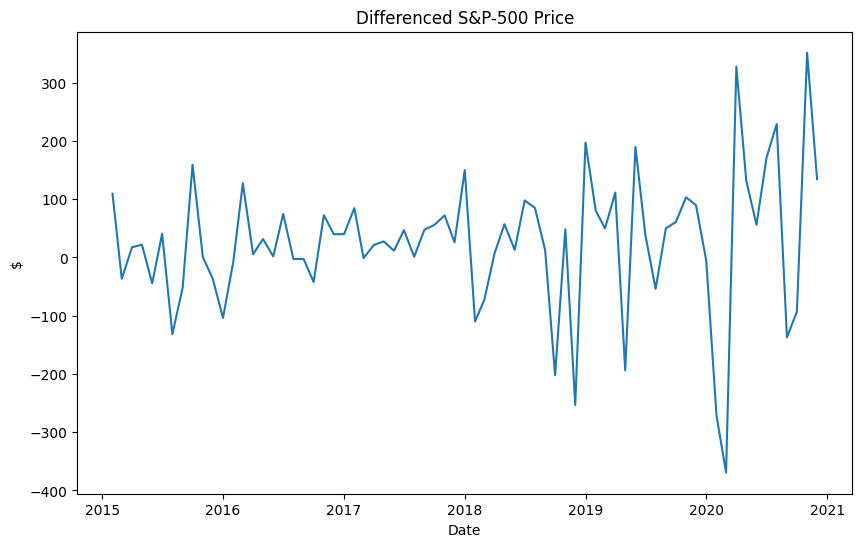

In [43]:
diff_SP_prices = SP_prices.diff()

plt.figure(figsize=(10,6))
plt.plot(diff_SP_prices)
plt.title("Differenced S&P-500 Price")
plt.ylabel("$")
plt.xlabel("Date")
plt.show()


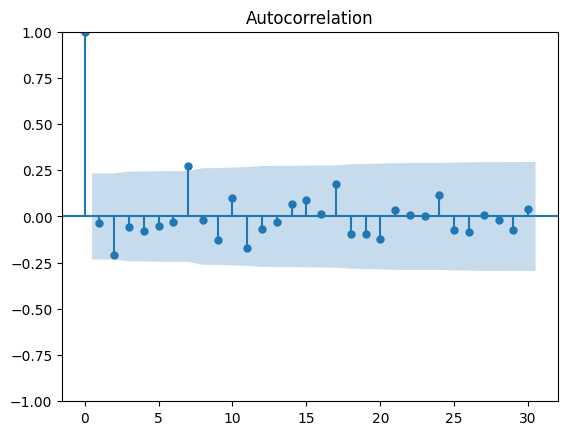

 The best statistic and p-value of ADF test for differenced series are (-7.0951058730170855, 4.309554814640538e-10)


In [44]:
sm.graphics.tsa.plot_acf(diff_SP_prices.dropna(), lags=30)
plt.show()
stat_test2=adfuller(diff_SP_prices.dropna())[0:2]
print(" The best statistic and p-value of ADF test for differenced series are {}".format(stat_test2))

As we can see by the test, we got a better $p$-value which tells that S&P 500 data is stationary now

Visually we can see that there is periodics ups and downs, a sign of nonstationarity

To get rid of seasonality, we apply the resample method to calculate anual mean:

$$ \text{Seasonal Index}=\frac{\text{Value of a Seasonal Time Series}}{\text{Seasonal Average}}

In [63]:
seasonal_index= energy.resample("Q").mean()

In [64]:
dates= energy.index.year.unique()
deseasonalized= []
for i in dates:
    for j in range (1,13):
        deseasonalized.append((energy[str(i)][energy[str(i)]\
                                              .index.month==j]))
contact_deseasonalized= np.concatenate(deseasonalized)